<a href="https://colab.research.google.com/github/AdityaJha021/102153003-SESS_LE1/blob/main/102153003_AdityaJha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

Name: **Aditya Jha**  
Email: `ajha1_be21@thapar.edu`  
Roll No: **102153003**  
Group: **4CO8**  


## Solution

## Question

Task
======

  Consider the paper: <https://arxiv.org/abs/1804.03209>

  1. Read and summarise the paper in about 50 words.
  2. Download the dataset in the paper, statistically analyse and
     describe it, so that it may be useful for posterity. (Include code
     snippets in your .ipynb file to evidence your analysis.)
  3. Train a classifier so that you are able to distinguish the commands
     in the dataset.
  4. Report the performance results using standard benchmarks.
  5. Record about 30 samples of each command in your voice and create a
     new dataset (including a new user id for yourself).  You may use a
     timer on your computer to synchronise.
  6. Fine tune your classifier to perform on your voice.
  7. Report the results.


In [2]:
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
!tar -xvzf speech_commands_v0.02.tar.gz



Streaming output truncated to the last 5000 lines.
./on/fc3ba625_nohash_0.wav
./on/db9d52d2_nohash_0.wav
./on/72242187_nohash_4.wav
./on/b0f5b16d_nohash_0.wav
./on/d9aa8c90_nohash_1.wav
./on/525eaa62_nohash_0.wav
./on/42e3f068_nohash_0.wav
./on/94d370bf_nohash_4.wav
./on/bf8d5617_nohash_0.wav
./on/e2b7d6d6_nohash_2.wav
./on/89ed36ab_nohash_0.wav
./on/30276d03_nohash_1.wav
./on/364c0853_nohash_0.wav
./on/7cbf645a_nohash_0.wav
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./o

In [3]:
!ls


_background_noise_  five     left     README.md			      stop		   wow
backward	    follow   LICENSE  right			      testing_list.txt	   yes
bed		    forward  marvin   sample_data		      three		   zero
bird		    four     nine     seven			      tree
cat		    go	     no       sheila			      two
dog		    happy    off      six			      up
down		    house    on       speech_commands_v0.02.tar.gz    validation_list.txt
eight		    learn    one      speech_commands_v0.02.tar.gz.1  visual


In [4]:
!tar -xvzf speech_commands_v0.02.tar.gz


Streaming output truncated to the last 5000 lines.
./on/fc3ba625_nohash_0.wav
./on/db9d52d2_nohash_0.wav
./on/72242187_nohash_4.wav
./on/b0f5b16d_nohash_0.wav
./on/d9aa8c90_nohash_1.wav
./on/525eaa62_nohash_0.wav
./on/42e3f068_nohash_0.wav
./on/94d370bf_nohash_4.wav
./on/bf8d5617_nohash_0.wav
./on/e2b7d6d6_nohash_2.wav
./on/89ed36ab_nohash_0.wav
./on/30276d03_nohash_1.wav
./on/364c0853_nohash_0.wav
./on/7cbf645a_nohash_0.wav
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./o

In [5]:
import os
print(os.getcwd())

/content


In [7]:
!ls /content



_background_noise_  five     left     README.md			      stop		   wow
backward	    follow   LICENSE  right			      testing_list.txt	   yes
bed		    forward  marvin   sample_data		      three		   zero
bird		    four     nine     seven			      tree
cat		    go	     no       sheila			      two
dog		    happy    off      six			      up
down		    house    on       speech_commands_v0.02.tar.gz    validation_list.txt
eight		    learn    one      speech_commands_v0.02.tar.gz.1  visual


In [9]:
data_dir = '/content'
commands = os.listdir(data_dir)
print(commands)


['.config', 'speech_commands_v0.02.tar.gz', 'right', 'eight', 'two', 'on', 'dog', 'bed', 'no', 'nine', 'cat', 'one', 'up', 'five', 'backward', 'left', 'learn', 'marvin', 'README.md', 'speech_commands_v0.02.tar.gz.1', 'go', 'follow', 'tree', 'off', 'validation_list.txt', 'testing_list.txt', 'stop', 'zero', 'six', 'visual', '.DS_Store', 'down', 'forward', 'LICENSE', 'happy', 'house', 'three', '_background_noise_', 'sheila', 'wow', 'seven', 'four', 'yes', 'bird', 'sample_data']


In [10]:
commands = [cmd for cmd in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cmd))]
print("Commands:", commands)



Commands: ['.config', 'right', 'eight', 'two', 'on', 'dog', 'bed', 'no', 'nine', 'cat', 'one', 'up', 'five', 'backward', 'left', 'learn', 'marvin', 'go', 'follow', 'tree', 'off', 'stop', 'zero', 'six', 'visual', 'down', 'forward', 'happy', 'house', 'three', '_background_noise_', 'sheila', 'wow', 'seven', 'four', 'yes', 'bird', 'sample_data']


Number of samples per command: {'.config': 10, 'right': 3778, 'eight': 3787, 'two': 3880, 'on': 3845, 'dog': 2128, 'bed': 2014, 'no': 3941, 'nine': 3934, 'cat': 2031, 'one': 3890, 'up': 3723, 'five': 4052, 'backward': 1664, 'left': 3801, 'learn': 1575, 'marvin': 2100, 'go': 3880, 'follow': 1579, 'tree': 1759, 'off': 3745, 'stop': 3872, 'zero': 4052, 'six': 3860, 'visual': 1592, 'down': 3917, 'forward': 1557, 'happy': 2054, 'house': 2113, 'three': 3727, '_background_noise_': 7, 'sheila': 2022, 'wow': 2123, 'seven': 3998, 'four': 3728, 'yes': 4044, 'bird': 2064, 'sample_data': 6}


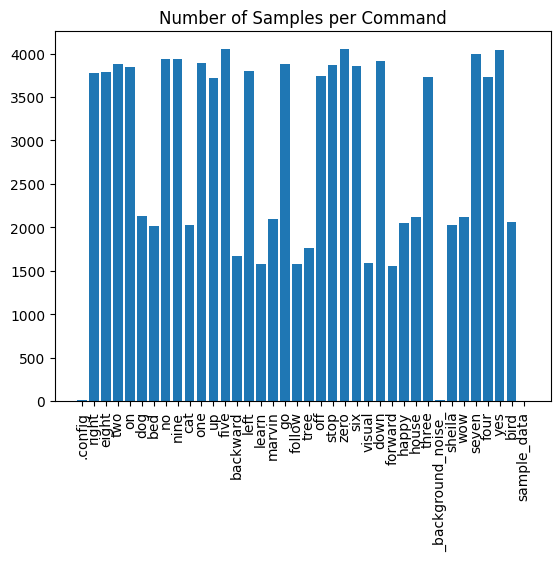

In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Analyze the number of samples per command
command_count = {command: len(os.listdir(os.path.join(data_dir, command))) for command in commands}
print("Number of samples per command:", command_count)

# Plot the distribution of samples per command
plt.bar(command_count.keys(), command_count.values())
plt.xticks(rotation=90)
plt.title('Number of Samples per Command')
plt.show()








In [21]:
import librosa
import librosa.display
import tensorflow as tf

def preprocess_audio(file_path, sr=16000):
    audio, sr = librosa.load(file_path, sr=sr)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spec_db = tf.image.resize(mel_spec_db, (128, 128))  # Resize to 128x128
    return mel_spec_db






In [32]:
!pip install tensorflow tensorflow-hub librosa scikit-learn joblib





In [41]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Function to extract MFCC features
def extract_features(file_path, sr=22050, n_mfcc=13):
    audio, _ = librosa.load(file_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)  # Return mean of MFCCs

# Prepare dataset (X, y)
data_dir = '/content'  # Replace with your data directory path
commands = [cmd for cmd in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cmd))]
label_map = {label: i for i, label in enumerate(commands)}

X = []
y = []

# Extract features for a subset of data for testing (first 100 files per class)
for label in commands:
    files = [file for file in os.listdir(os.path.join(data_dir, label)) if file.endswith('.wav')]
    for file in files[:1000]:  # Limiting to first 100 files per class
        file_path = os.path.join(data_dir, label, file)
        features = extract_features(file_path)
        X.append(features)
        y.append(label_map[label])

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the model and scaler for later use
joblib.dump(model, 'logistic_regression_command_classifier.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Optionally, evaluate the model
y_pred = model.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred)}")


Validation Accuracy: 0.25378463296201087


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.2538
Precision: 0.2433
Recall: 0.2538
F1 Score: 0.2420


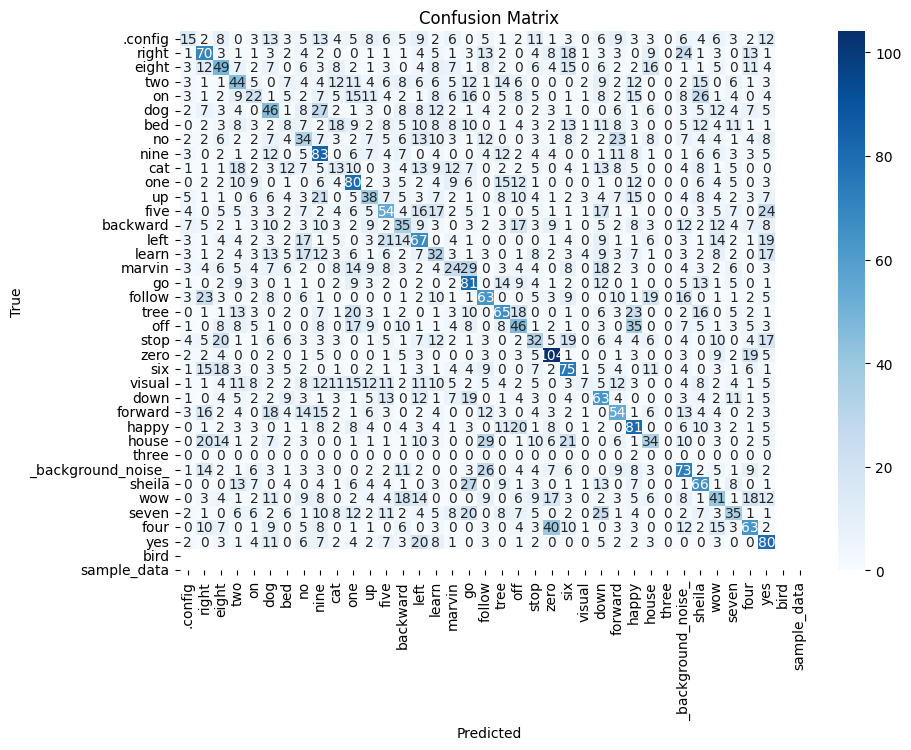

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_val, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=commands, yticklabels=commands)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Test Case